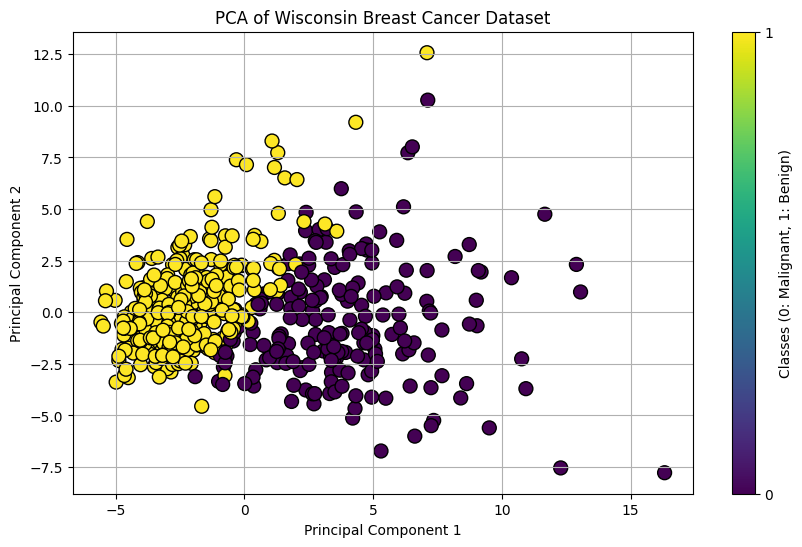

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

# Load the Wisconsin Breast Cancer dataset
cancer = datasets.load_breast_cancer()
X = cancer.data
y = cancer.target

# Create a DataFrame for easier manipulation
df = pd.DataFrame(X, columns=cancer.feature_names)

# Step 1: Standardize the data (Z-score scaling)
scaler = StandardScaler()
standardized_data = scaler.fit_transform(df)

# Step 2: Calculate the covariance matrix
covariance_matrix = np.cov(standardized_data, rowvar=False)

# Step 3: Perform eigendecomposition
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

# Step 4: Sort the eigenvalues and corresponding eigenvectors
sorted_indices = np.argsort(eigenvalues)[::-1]  # Sort in descending order
sorted_eigenvalues = eigenvalues[sorted_indices]
sorted_eigenvectors = eigenvectors[:, sorted_indices]

# Step 5: Select the first 2 principal components
top_2_eigenvectors = sorted_eigenvectors[:, :2]

# Step 6: Project the standardized data onto the first 2 principal components
projected_data = standardized_data.dot(top_2_eigenvectors)

# Step 7: Plot the projected data
plt.figure(figsize=(10, 6))
scatter = plt.scatter(projected_data[:, 0], projected_data[:, 1], c=y, cmap='viridis', edgecolor='k', s=100)
plt.title('PCA of Wisconsin Breast Cancer Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(scatter, ticks=[0, 1], label='Classes (0: Malignant, 1: Benign)')
plt.grid()
plt.show()

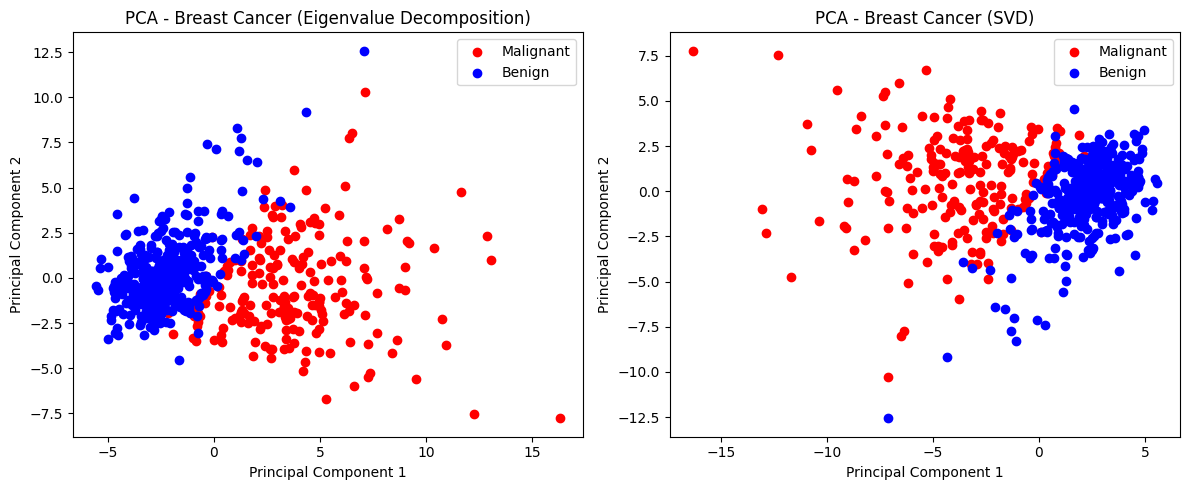

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load the Breast Cancer dataset
data = datasets.load_breast_cancer()
X = data.data
y = data.target

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA using Eigenvalue Decomposition
pca_eigen = PCA(n_components=2)
X_pca_eigen = pca_eigen.fit_transform(X_scaled)

# Perform PCA using SVD
U, S, Vt = np.linalg.svd(X_scaled)
X_pca_svd = U[:, :2] * S[:2]  # Project onto the first two components

# Plot the results for Eigenvalue Decomposition
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X_pca_eigen[y == 0, 0], X_pca_eigen[y == 0, 1], color='red', label='Malignant')
plt.scatter(X_pca_eigen[y == 1, 0], X_pca_eigen[y == 1, 1], color='blue', label='Benign')
plt.title('PCA - Breast Cancer (Eigenvalue Decomposition)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()

# Plot the results for SVD
plt.subplot(1, 2, 2)
plt.scatter(X_pca_svd[y == 0, 0], X_pca_svd[y == 0, 1], color='red', label='Malignant')
plt.scatter(X_pca_svd[y == 1, 0], X_pca_svd[y == 1, 1], color='blue', label='Benign')
plt.title('PCA - Breast Cancer (SVD)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()

plt.tight_layout()
plt.show()
